In [1]:
# Simulate an ODE

import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

In [2]:
# Example 0

#pendulumn
g = 9.8
l = 0.1
A = [[0, 1], 
     [g/l, 0]]
#print(A)

#cart
m = 1
D0 = 1
A = [[0, 1], 
     [0, -D0/m]]
#print(A)

# Define linear ODE
def f(t, x):
    return np.dot(A,x)

In [3]:
# Solve ODES
t0, t1 = 0, 20                # start and end
t = np.linspace(t0, t1, 100)  # the points of evaluation of solution             
#x0 = [np.random.uniform(-1, 1), np.random.uniform(-1, 1)] # initial value
x0 = [5, 1] # initial value
#print(x0)
x = np.zeros((len(t), len(x0)))   # array for solution
x[0,:] = x0
r = integrate.ode(f).set_integrator("dopri5")  # choice of method
r.set_initial_value(x0, t0)   # initial values

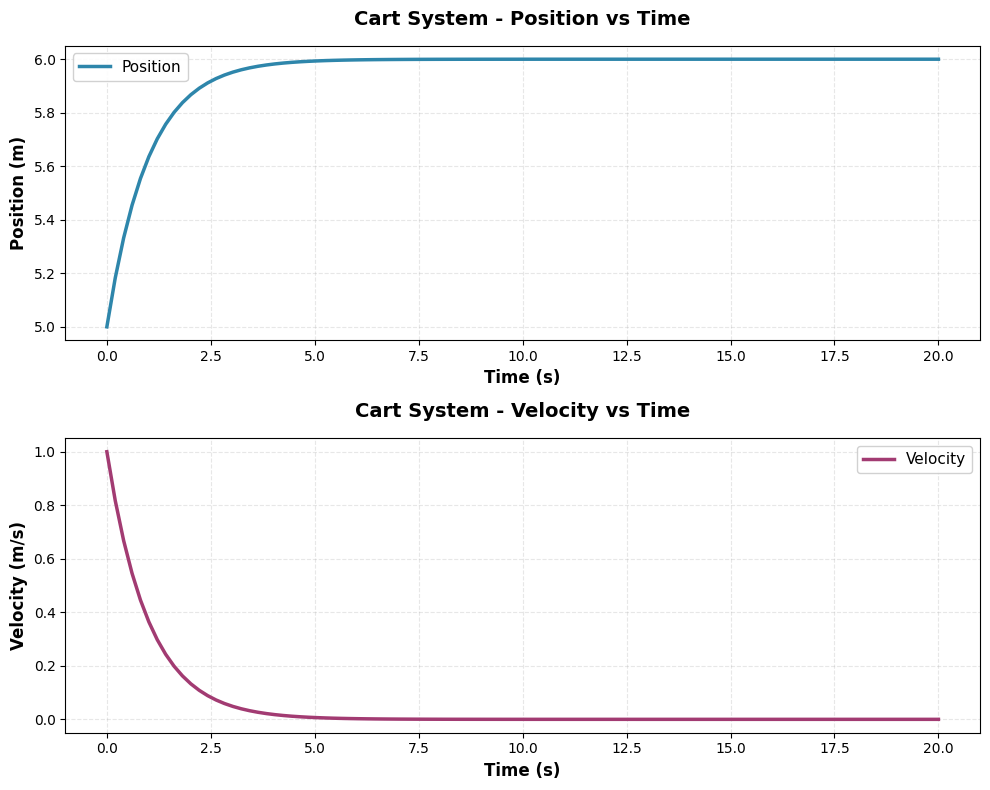

In [4]:
# Plot
for i in range(1, t.size):
   x[i, :] = r.integrate(t[i]) # get one more value, add it to the array
   if not r.successful():
       raise RuntimeError("Could not integrate")
# plt.plot(t, x)
# plt.show()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot position
ax1.plot(t, x[:, 0], linewidth=2.5, color='#2E86AB', label='Position')
ax1.set_xlabel('Time (s)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Position (m)', fontsize=12, fontweight='bold')
ax1.set_title('Cart System - Position vs Time', fontsize=14, fontweight='bold', pad=15)
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.legend(fontsize=11, framealpha=0.9)
ax1.tick_params(labelsize=10)

# Plot velocity
ax2.plot(t, x[:, 1], linewidth=2.5, color='#A23B72', label='Velocity')
ax2.set_xlabel('Time (s)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Velocity (m/s)', fontsize=12, fontweight='bold')
ax2.set_title('Cart System - Velocity vs Time', fontsize=14, fontweight='bold', pad=15)
ax2.grid(True, alpha=0.3, linestyle='--')
ax2.legend(fontsize=11, framealpha=0.9)
ax2.tick_params(labelsize=10)

plt.tight_layout()
plt.show()

# Optional: Phase portrait
# fig2, ax3 = plt.subplots(figsize=(8, 8))
# ax3.plot(x[:, 0], x[:, 1], linewidth=2.5, color='#F18F01', label='Trajectory')
# ax3.plot(x[0, 0], x[0, 1], 'go', markersize=12, label='Start', zorder=5)
# ax3.plot(x[-1, 0], x[-1, 1], 'rs', markersize=12, label='End', zorder=5)
# ax3.set_xlabel('Position (m)', fontsize=12, fontweight='bold')
# ax3.set_ylabel('Velocity (m/s)', fontsize=12, fontweight='bold')
# ax3.set_title('Phase Portrait - Damped Cart System', fontsize=14, fontweight='bold', pad=15)
# ax3.grid(True, alpha=0.3, linestyle='--')
# ax3.legend(fontsize=11, framealpha=0.9)
# ax3.tick_params(labelsize=10)
# ax3.axhline(y=0, color='k', linewidth=0.5, alpha=0.5)
# ax3.axvline(x=0, color='k', linewidth=0.5, alpha=0.5)
# plt.tight_layout()
# plt.show()